Revenue Prediction
==================
In this project the goal is to predict movies revenue using their features. revenue is given by ( box_office - budget ) so the main goal is to predict box office. 

1. Prepare and preprocess the given data. 

2. After exploring data find, select and especially create new features. ignore others.

3. Prepare features to feed the model. 

4. Select and try different models.

5. Document and report each step using relative plots and a brief explanation. finally report the best suited model and justify why did it performed well.



- Keep in mind that in this task accuracy itself only has only part of score.

- Hint: to create new features you can use credit attributes. Think of it this way, what affects box office?  

**Tools** 

importing useful tools and libraries. you may use any other library as well.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modelling
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import ast

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.ticker as ticker
%matplotlib inline

# تنظیمات نمایش
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go

# Setting display options
pd.set_option('display.max_columns', None)

In [2]:
np.random.seed(101)

In [3]:
# Your project struct must look like this,


# |── Name_SID.zip
# │   ├── data
# │   │       ├── rotten_tomatoes_5000_movies.csv
# │   │       ├── rotten_tomatoes_5000_movies.csv
# │   ├── *.ipynb
# │   ├── document.pdf

df_movies = pd.read_csv(r"data/rotten_tomatoes_5000_movies.csv")
df_credit = pd.read_csv(r"data/rotten_tomatoes_5000_credits.csv")

print("MOVIES\n--------------------------------------------\n")
print(df_movies.head(10))
print("CREDIT\n--------------------------------------------\n")
print(df_credit.head(10))


MOVIES
--------------------------------------------

   rt_production_budget                                          rt_genres  \
0             237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1             300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2             245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3             250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4             260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
5             258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...   
6             260000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   
7             280000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
8             250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
9             250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                          rt_website  rt_movie_id  \
0                  

# 2. Loading and Merging Data

In [4]:
# Merging dataframes on 'rt_movie_id'
df = df_movies.merge(df_credit, on='rt_movie_id')

# Displaying the first few rows of the merged dataframe
print("Merged DataFrame:\n")
display(df.head())




Merged DataFrame:



,rt_production_budget,rt_genres,rt_website,rt_movie_id,rt_keywords,rt_original_language,rt_original_title,rt_synopsis,rt_audience_score,rt_studios,rt_production_countries,rt_release_date,rt_box_office,rt_runtime,rt_languages,rt_release_status,rt_tagline,rt_title_x,rt_critics_score,rt_review_count,rt_title_y,rt_actors,rt_staff
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# 3. Data Cleaning and Preprocessing

## 3.1 Removing Movies with Zero Box Office Revenue

In [5]:
# Dropping movies with zero box office revenue
df = df[df['rt_box_office'] != 0]

# Confirming the removal
print(f"Number of movies after removing zero box office: {df.shape[0]}")

Number of movies after removing zero box office: 3376


## 3.2 Extracting Release Year

In [6]:
# Extracting release year from 'rt_release_date'
df['release_year'] = pd.to_datetime(df['rt_release_date'], errors='coerce').dt.year

# Dropping rows with invalid release dates
df = df.dropna(subset=['release_year'])

# Converting release_year to integer
df['release_year'] = df['release_year'].astype(int)

# Displaying the first few rows after extracting release_year
print("DataFrame after extracting release_year:\n")
display(df[['rt_release_date', 'release_year']].head())


DataFrame after extracting release_year:



,rt_release_date,release_year
0,2009-12-10,2009
1,2007-05-19,2007
2,2015-10-26,2015
3,2012-07-16,2012
4,2012-03-07,2012


## 3.3 Handling Missing Values

In [7]:
print("Missing values in each column before cleaning:")
print(df.isnull().sum())
# Dropping columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)
df['rt_title'] = df['rt_title_x']

# Filling remaining missing values
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column] = df[column].fillna(df[column].mean())
    else:
        if df[column].dtype == 'object':
            # For object types, fill with mode if available
            if not df[column].mode().empty:
                df[column] = df[column].fillna(df[column].mode()[0])
            else:
                df[column] = df[column].fillna('Unknown')

# Displaying missing values after cleaning
print("\nMissing values in each column after cleaning:")
print(df.isnull().sum())


Missing values in each column before cleaning:
rt_production_budget          0
rt_genres                     0
rt_website                 1980
rt_movie_id                   0
rt_keywords                   0
rt_original_language          0
rt_original_title             0
rt_synopsis                   0
rt_audience_score             0
rt_studios                    0
rt_production_countries       0
rt_release_date               0
rt_box_office                 0
rt_runtime                    0
rt_languages                  0
rt_release_status             0
rt_tagline                  282
rt_title_x                    0
rt_critics_score              0
rt_review_count               0
rt_title_y                    0
rt_actors                     0
rt_staff                      0
release_year                  0
dtype: int64

Missing values in each column after cleaning:
rt_production_budget       0
rt_genres                  0
rt_movie_id                0
rt_keywords                0
rt_origin

# 4. Feature Extraction

## 4.1 Safely Extracting JSON-Like Columns

In [8]:
# Function to safely extract lists from JSON-like strings
def safe_extract(column):
    def extract_func(x):
        try:
            return [item['name'] for item in ast.literal_eval(x)]
        except:
            return []
    return df[column].apply(extract_func)

# Extracting genres
df['genres_list'] = safe_extract('rt_genres')

# Extracting production countries
df['countries_list'] = safe_extract('rt_production_countries')

# Extracting languages
df['languages_list'] = safe_extract('rt_languages')

# Extracting actors
def extract_actors(actors_str):
    try:
        return [actor['name'] for actor in ast.literal_eval(actors_str)]
    except:
        return []

df['actors_list'] = df['rt_actors'].apply(extract_actors)
df_genres = df.explode('genres_list').copy()

# اطمینان از اینکه release_year در df_genres وجود دارد:
if 'release_year' not in df_genres.columns:
    # اگر در بخشی از کد ستون را حذف کردید، اینجا باید مجدداً اضافه شود یا از df_main استخراج شود.
    df_genres['release_year'] = df_genres['release_year']

# Displaying the extracted features
print("Extracted Features:\n")
display(df[['rt_genres', 'genres_list', 'rt_production_countries', 'countries_list', 'rt_languages', 'languages_list', 'rt_actors', 'actors_list']].head())


Extracted Features:



,rt_genres,genres_list,rt_production_countries,countries_list,rt_languages,languages_list,rt_actors,actors_list
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Fantasy, Science Fiction]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[United States of America, United Kingdom]","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","[English, Español]","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[Adventure, Fantasy, Action]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",[United States of America],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",[English],"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Crime]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[United Kingdom, United States of America]","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...","[Français, English, Español, Italiano, Deutsch]","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[Action, Crime, Drama, Thriller]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",[United States of America],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",[English],"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[Christian Bale, Michael Caine, Gary Oldman, A..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Science Fiction]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",[United States of America],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",[English],"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[Taylor Kitsch, Lynn Collins, Samantha Morton,..."


## 4.2 Top 5 Cast Members and Gender Determination

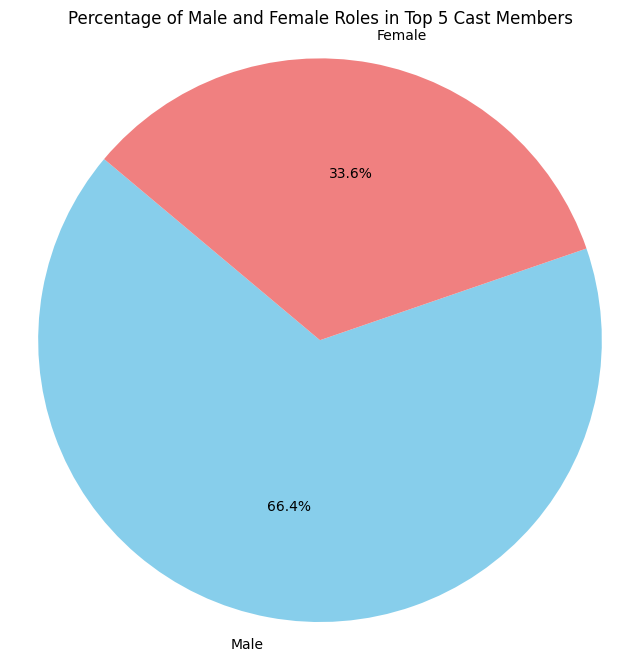

In [9]:
## 4.2 Top 5 Cast Members and Gender Determination

# Define a mapping for gender codes
gender_mapping = {
    0: 'Unknown',
    1: 'Female',
    2: 'Male'
}

# Function to safely extract top cast names and their genders
def extract_top_cast_info(actors_str, top_n=5):
    try:
        actors = ast.literal_eval(actors_str)
        top_cast = actors[:top_n]
        # Extract both name and gender
        return [(actor['name'], actor['gender']) for actor in top_cast]
    except:
        return []

# Apply the function to extract top cast info
df['top_cast_info'] = df['rt_actors'].apply(lambda x: extract_top_cast_info(x, 5))

# Function to map gender codes to labels
def map_gender(gender_code):
    return gender_mapping.get(gender_code, 'Unknown')

# Extract genders from top_cast_info
df['gender'] = df['top_cast_info'].apply(lambda cast: [map_gender(gender) for name, gender in cast])

# Calculating percentage of male and female roles
male_counts = df['gender'].apply(lambda x: x.count('Male')).sum()
female_counts = df['gender'].apply(lambda x: x.count('Female')).sum()
total = male_counts + female_counts

percent_male = (male_counts / total) * 100 if total > 0 else 0
percent_female = (female_counts / total) * 100 if total > 0 else 0

# Displaying percentage of male and female roles
labels = ['Male', 'Female']
sizes = [percent_male, percent_female]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Male and Female Roles in Top 5 Cast Members')
plt.axis('equal')
plt.show()


# 5. Exploratory Data Analysis (EDA)

## 5.1 Average Production Budget per Genre

In [10]:
# Calculating average production budget per genre
avg_budget_genre = df.explode('genres_list').groupby('genres_list')['rt_production_budget'].mean().sort_values(ascending=False)

# Plotting
# 5.1 Average Production Budget per Genre

# Creating the bar plot
# plt.figure(figsize=(12,8))
# sns.barplot(x=avg_budget_genre.values, y=avg_budget_genre.index, palette='viridis')
# plt.xlabel('Average Production Budget (USD)')
# plt.ylabel('Genre')
# plt.title('Average Production Budget per Genre')
# plt.show()

fig = px.bar(
    x=avg_budget_genre.values,
    y=avg_budget_genre.index,
    orientation='h',
    labels={'x': 'Average Production Budget (USD)', 'y': 'Genre'},
    title='Average Production Budget per Genre',
    color=avg_budget_genre.values,
    color_continuous_scale='Viridis'
)

# Updating layout for better readability
fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    coloraxis_showscale=False
)

# Display the plot
fig.show()



## 5.2 Production Budget Share by Country for Top 5 Expensive Genres

In [11]:
total_budget_genre = (
    df_genres.groupby('genres_list')['rt_production_budget']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# 2) فیلتر ژانرهای پرخرج
df_top5_genres = df_genres[df_genres['genres_list'].isin(total_budget_genre)].copy()

# 3) استخراج کشورها
def extract_countries(countries_str):
    try:
        countries = ast.literal_eval(countries_str)
        return [country['name'] for country in countries]
    except:
        return []

df_top5_genres['countries_list'] = df_top5_genres['rt_production_countries'].apply(extract_countries)

# 4) ایجاد دیتافریم جدید با هر کشور در یک ردیف
df_countries = df_top5_genres.explode('countries_list').copy()

# 5) اطمینان از وجود ستون release_year در df_countries
if 'release_year' not in df_countries.columns:
    df_countries['release_year'] = df_countries['release_year']

# 6) محاسبه سهم هر کشور در مجموع هزینه هر ژانر
budget_country_genre = (
    df_countries.groupby(['genres_list', 'countries_list'])['rt_production_budget']
    .sum()
    .reset_index()
)

# 7) نمایش سهم کشورهای مختلف برای هر ژانر پرخرج
# 5.2 Production Budget Share by Country for Top 5 Expensive Genres

for genre in total_budget_genre:
    data = budget_country_genre[budget_country_genre['genres_list'] == genre] \
                                .sort_values(by='rt_production_budget', ascending=False)
    if data.empty:
        print(f"No valid country data found for genre: {genre}")
        continue

    # plt.figure(figsize=(10,12))
    # sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')
    # plt.xlabel('Production Budget (USD)')
    # plt.ylabel('Country')
    # plt.title(f'Production Budget Share by Country for {genre} Genre')
    # plt.show()
    
    fig = px.bar(
        data,
        x='rt_production_budget',
        y='countries_list',
        orientation='h',
        labels={'rt_production_budget': 'Production Budget (USD)', 'countries_list': 'Country'},
        title=f'Production Budget Share by Country for {genre} Genre',
        color='rt_production_budget',
        color_continuous_scale='Magma'
    )
    
    fig.update_layout(
        yaxis=dict(categoryorder='total ascending'),
        coloraxis_showscale=False
    )
    
    fig.show()


## 5.3 Number of Movies Produced in Action, Drama, Comedy Genres Over the Last 10 Years

In [44]:
current_year = df_genres['release_year'].max()
df_last10 = df_genres[df_genres['release_year'] >= (current_year - 10)].copy()

#fix year

selected_genres = ['Action', 'Drama', 'Comedy']
df_selected_genres = df_last10[df_last10['genres_list'].isin(selected_genres)].copy()

movies_count = (
    df_selected_genres
    .groupby(['release_year', 'genres_list'])['rt_movie_id']
    .count()
    .unstack()
)

# 5.3 Number of Movies Produced in Action, Drama, Comedy Genres Over the Last 10 Years

if movies_count.empty:
    print("Error: 'movies_count' DataFrame is empty.")
else:
    # movies_count.plot(kind='line', figsize=(14,7), marker='o')
    # plt.xlabel('Year')
    # plt.ylabel('Number of Movies')
    # plt.title('Number of Movies Produced in Action, Drama, Comedy Genres Over the Last 10 Years')
    # plt.legend(title='Genre')
    # plt.show()
    fig = px.line(
        movies_count,
        x=movies_count.index,
        y=movies_count.columns,
        markers=True,
        labels={'value': 'Number of Movies', 'release_year': 'Year', 'variable': 'Genre'},
        title='Number of Movies Produced in Action, Drama, Comedy Genres Over the Last 10 Years'
    )
    
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Number of Movies',
        legend_title='Genre'
    )
    
    fig.show()



## 5.4 Average Movie Runtime by Country

In [25]:
# Exploding countries_list for the entire dataframe
df_countries_all = df.explode('countries_list').copy()

# Filling missing runtime values with mean
df_countries_all['rt_runtime'] = df_countries_all['rt_runtime'].fillna(df_countries_all['rt_runtime'].mean())

# Calculating average runtime by country
avg_runtime_country = df_countries_all.groupby('countries_list')['rt_runtime'].mean().sort_values()

avg_runtime_country_df = avg_runtime_country.sort_values().reset_index()
avg_runtime_country_df.columns = ['Country', 'rt_runtime']

# Displaying top 5 countries with shortest and longest average runtime
print("Top 5 Countries with Shortest Average Movie Runtime:")
print(avg_runtime_country.head(5))

print("\nTop 5 Countries with Longest Average Movie Runtime:")
print(avg_runtime_country.tail(5))

# Plotting
# plt.figure(figsize=(12,18))
# sns.barplot(x=avg_runtime_country.values, y=avg_runtime_country.index, palette='coolwarm')
# plt.xlabel('Average Runtime (Minutes)')
# plt.ylabel('Country')
# plt.title('Average Movie Runtime by Country')

# # افزایش فاصله برچسب‌های محور y
# plt.tick_params(axis='y', which='major', pad=30)

# plt.show()

# 5.4 Average Movie Runtime by Country

fig = px.bar(
    avg_runtime_country_df,
    x='rt_runtime',
    y='Country',
    orientation='h',
    labels={'rt_runtime': 'Average Runtime (Minutes)', 'Country': 'Country'},
    title='Average Movie Runtime by Country',
    color='rt_runtime',
    color_continuous_scale='Viridis'
)

# Updating layout for better readability
fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    coloraxis_showscale=True  # Show color scale for better interpretation
)

# Display the plot
fig.show()




Top 5 Countries with Shortest Average Movie Runtime:
countries_list
Monaco    84.0
Angola    85.0
Iran      89.0
Israel    90.0
Fiji      98.0
Name: rt_runtime, dtype: float64

Top 5 Countries with Longest Average Movie Runtime:
countries_list
Morocco      141.333333
Malta        143.000000
Slovenia     150.000000
Dominica     151.000000
Singapore    172.000000
Name: rt_runtime, dtype: float64


## 5.5 Top 10 Most Common Languages in Movies (Excluding English)

In [29]:
# Exploding languages_list
df_languages = df.explode('languages_list').copy()

# Filtering out English
df_non_english = df_languages[df_languages['languages_list'] != 'English'].copy()

# Counting languages
language_counts = df_non_english['languages_list'].value_counts().head(10)

# Plotting
# plt.figure(figsize=(10,6))
# sns.barplot(x=language_counts.values, y=language_counts.index, palette='pastel')
# plt.xlabel('Number of Movies')
# plt.ylabel('Language')
# plt.title('Top 10 Most Common Languages in Movies (Excluding English)')
# plt.show()

# 5.5 Top 10 Most Common Languages in Movies (Excluding English)

fig = px.bar(
    language_counts,
    x=language_counts.values,
    y=language_counts.index,
    orientation='h',
    labels={'x': 'Number of Movies', 'y': 'Language'},
    title='Top 10 Most Common Languages in Movies (Excluding English)',
    color=language_counts.values,
    color_continuous_scale='Blues'  # Use a continuous color scale
)

fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    coloraxis_showscale=True
)

fig.show()


## 5.6 Annual Film Production Budget in USA Over the Last 10 Years

In [30]:
## 5.6 Annual Film Production Budget in USA Over the Last 10 Years

# Dynamically set current_year based on the latest year in the dataset
current_year = df_genres['release_year'].max()

# Filtering for USA and the last 10 years
df_us_last10 = df_countries_all[
    (df_countries_all['countries_list'] == 'United States of America') &
    (df_countries_all['release_year'] >= (current_year - 10))
].copy()

# Calculating annual budget for USA over the last 10 years
annual_budget_us = df_us_last10.groupby('release_year')['rt_production_budget'].sum().reset_index()

# Plotting
# plt.figure(figsize=(12,6))
# sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_us, marker='o', label='USA Budget')
# plt.xlabel('Year')
# plt.ylabel('Production Budget (USD)')
# plt.title('Annual Film Production Budget in USA Over the Last 10 Years')
# plt.legend()
# plt.show()
fig = px.line(
    annual_budget_us,
    x='release_year',
    y='rt_production_budget',
    markers=True,
    labels={'release_year': 'Year', 'rt_production_budget': 'Production Budget (USD)'},
    title='Annual Film Production Budget in USA Over the Last 10 Years',
    # Remove 'name' parameter
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Production Budget (USD)',
    template='plotly_white'
)

fig.show()


## 5.7 Comparison of Film Production Budget Trends Over the Last 10 Years

In [16]:
## 5.7 Comparison of Film Production Budget Trends Over the Last 10 Years

# Calculating total annual budget for the last 10 years
annual_budget_total = df_last10.groupby('release_year')['rt_production_budget'].sum().reset_index()

# Plotting comparison
# plt.figure(figsize=(12,6))
# sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_total, marker='o', label='Total Budget')
# sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_us, marker='o', label='USA Budget')
# plt.xlabel('Year')
# plt.ylabel('Production Budget (USD)')
# plt.title('Comparison of Film Production Budget Trends Over the Last 10 Years')
# plt.legend()
# plt.show()
fig = go.Figure()

# Adding Total Budget line
fig.add_trace(go.Scatter(
    x=annual_budget_total['release_year'],
    y=annual_budget_total['rt_production_budget'],
    mode='lines+markers',
    name='Total Budget',
    line=dict(color='blue')
))

# Adding USA Budget line
fig.add_trace(go.Scatter(
    x=annual_budget_us['release_year'],
    y=annual_budget_us['rt_production_budget'],
    mode='lines+markers',
    name='USA Budget',
    line=dict(color='red')
))

# Updating layout
fig.update_layout(
    title='Comparison of Film Production Budget Trends Over the Last 10 Years',
    xaxis_title='Year',
    yaxis_title='Production Budget (USD)',
    legend_title='Budget Type',
    template='plotly_white'
)

fig.show()


## 5.8 Movies Featuring Johnny Depp

In [17]:
# Filtering movies featuring Johnny Depp
df_johnny = df[df['actors_list'].apply(lambda x: 'Johnny Depp' in x)].copy()

# Checking if 'rt_title' exists
if 'rt_title' in df_johnny.columns:
    print("Movies featuring Johnny Depp:")
    for title in df_johnny['rt_title'].tolist():
        print(f"- {title}")
else:
    print("Column 'rt_title' does not exist in the dataframe.")


Movies featuring Johnny Depp:
- Pirates of the Caribbean: At World's End
- Pirates of the Caribbean: Dead Man's Chest
- The Lone Ranger
- Pirates of the Caribbean: On Stranger Tides
- Alice in Wonderland
- Alice Through the Looking Glass
- Charlie and the Chocolate Factory
- Dark Shadows
- Rango
- Pirates of the Caribbean: The Curse of the Black Pearl
- Public Enemies
- The Tourist
- Transcendence
- Jack and Jill
- Mortdecai
- Black Mass
- Into the Woods
- From Hell
- 21 Jump Street
- Secret Window
- The Ninth Gate
- A Nightmare on Elm Street
- Donnie Brasco
- The Astronaut's Wife
- Blow
- Corpse Bride
- The Imaginarium of Doctor Parnassus
- Once Upon a Time in Mexico
- Chocolat
- Finding Neverland
- Don Juan DeMarco
- Edward Scissorhands
- Fear and Loathing in Las Vegas
- Ed Wood
- What's Eating Gilbert Grape
- Platoon
- Freddy's Dead: The Final Nightmare
- Tusk


## 5.10 Top Genres by Review Count & Average Critics Score Over the Last 10 Years

In [18]:
# Calculating top genres by review count
top_genres_reviews = df.explode('genres_list').loc[df['release_year'] >= (current_year - 10)].groupby('genres_list')['rt_review_count'].sum().sort_values(ascending=False).head(5)

# Calculating top genres by average critics score
top_genres_critics = df.explode('genres_list').loc[df['release_year'] >= (current_year - 10)].groupby('genres_list')['rt_critics_score'].mean().sort_values(ascending=False).head(5)

# Plotting
# fig, axes = plt.subplots(1, 2, figsize=(20,8))

# sns.barplot(x=top_genres_reviews.values, y=top_genres_reviews.index, ax=axes[0], palette='deep')
# axes[0].set_title('Top Genres by Review Count')
# axes[0].set_xlabel('Number of Reviews')
# axes[0].set_ylabel('Genre')

# sns.barplot(x=top_genres_critics.values, y=top_genres_critics.index, ax=axes[1], palette='muted')
# axes[1].set_title('Top Genres by Average Critics Score')
# axes[1].set_xlabel('Average Critics Score')
# axes[1].set_ylabel('Genre')

# plt.show()

from plotly.subplots import make_subplots

# Creating a subplot with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Top Genres by Review Count", "Top Genres by Average Critics Score")
)

# Adding Top Genres by Review Count
fig.add_trace(
    go.Bar(
        x=top_genres_reviews.values,
        y=top_genres_reviews.index,
        orientation='h',
        name='Review Count',
        marker=dict(color='indigo')
    ),
    row=1, col=1
)

# Adding Top Genres by Average Critics Score
fig.add_trace(
    go.Bar(
        x=top_genres_critics.values,
        y=top_genres_critics.index,
        orientation='h',
        name='Average Critics Score',
        marker=dict(color='teal')
    ),
    row=1, col=2
)

# Updating layout
fig.update_layout(
    height=800,
    width=1200,
    title_text="Top Genres by Review Count & Average Critics Score Over the Last 10 Years",
    showlegend=False,
    template='plotly_white'
)

# Updating axes labels
fig.update_xaxes(title_text="Number of Reviews", row=1, col=1)
fig.update_yaxes(title_text="Genre", row=1, col=1)

fig.update_xaxes(title_text="Average Critics Score", row=1, col=2)
fig.update_yaxes(title_text="Genre", row=1, col=2)

fig.show()


# 5.11 Genre Popularity Over Time

In [19]:
# 5.9 Genre Popularity Over Time

# Filtering for the last 10 years
df_last10 = df_genres[df_genres['release_year'] >= (current_year - 10)].copy()

# Define selected genres to analyze
selected_genres = ['Action', 'Drama', 'Comedy', 'Thriller', 'Horror']

# Filter genres
df_selected_genres = df_last10[df_last10['genres_list'].isin(selected_genres)].copy()

# Count number of movies per genre per year
genre_popularity = (
    df_selected_genres
    .groupby(['release_year', 'genres_list'])['rt_movie_id']
    .count()
    .unstack()
    .fillna(0)
)

# Plotting
# genre_popularity.plot(kind='line', figsize=(14,7), marker='o')
# plt.xlabel('Year')
# plt.ylabel('Number of Movies')
# plt.title('Genre Popularity Over the Last 10 Years')
# plt.legend(title='Genre')
# plt.show()

fig = px.line(
    genre_popularity,
    x=genre_popularity.index,
    y=genre_popularity.columns,
    markers=True,
    labels={'value': 'Number of Movies', 'release_year': 'Year', 'variable': 'Genre'},
    title='Genre Popularity Over the Last 10 Years'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Movies',
    legend_title='Genre',
    template='plotly_white'
)

fig.show()


# 5.12 Correlation Between Production Budget and Box Office Revenue


In [20]:
# 5.10 Correlation Between Production Budget and Box Office Revenue

# Selecting relevant columns
budget_boxoffice = df[['rt_production_budget', 'rt_box_office']].copy()

# Removing any potential outliers for better visualization
budget_boxoffice = budget_boxoffice[(budget_boxoffice['rt_production_budget'] < budget_boxoffice['rt_production_budget'].quantile(0.95)) &
                                    (budget_boxoffice['rt_box_office'] < budget_boxoffice['rt_box_office'].quantile(0.95))]

# Calculating correlation
correlation = budget_boxoffice.corr().iloc[0,1]
print(f"Correlation between Production Budget and Box Office Revenue: {correlation:.2f}")

# Scatter plot with regression line
# plt.figure(figsize=(10,6))
# sns.regplot(x='rt_production_budget', y='rt_box_office', data=budget_boxoffice, scatter_kws={'alpha':0.5})
# plt.xlabel('Production Budget (USD)')
# plt.ylabel('Box Office Revenue (USD)')
# plt.title('Correlation Between Production Budget and Box Office Revenue')
# plt.show()

fig = px.scatter(
    budget_boxoffice,
    x='rt_production_budget',
    y='rt_box_office',
    trendline='ols',
    labels={'rt_production_budget': 'Production Budget (USD)', 'rt_box_office': 'Box Office Revenue (USD)'},
    title='Correlation Between Production Budget and Box Office Revenue',
    opacity=0.5
)

fig.update_layout(
    template='plotly_white'
)

fig.show()


Correlation between Production Budget and Box Office Revenue: 0.58


# 5.13 Distribution of Movie Ratings

In [45]:
# 5.13 Distribution of Movie Ratings

# Selecting relevant columns
ratings = df[['rt_critics_score', 'rt_audience_score']].copy()

# Plotting distribution for Critics Score
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(ratings['rt_critics_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Critics Scores')
plt.xlabel('Critics Score')
plt.ylabel('Number of Movies')

# Plotting distribution for Audience Score
plt.subplot(1,2,2)
sns.histplot(ratings['rt_audience_score'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Audience Scores')
plt.xlabel('Audience Score')
plt.ylabel('Number of Movies')

plt.tight_layout()
plt.show()


AttributeError: 'NoneType' object has no attribute 'constructor'

# 5.14 Relationship Between Runtime and Box Office Revenue

In [35]:
# 5.14 Relationship Between Runtime and Box Office Revenue

# Selecting relevant columns
runtime_boxoffice = df[['rt_runtime', 'rt_box_office']].copy()

# Removing outliers
runtime_boxoffice = runtime_boxoffice[(runtime_boxoffice['rt_runtime'] < runtime_boxoffice['rt_runtime'].quantile(0.95)) &
                                      (runtime_boxoffice['rt_box_office'] < runtime_boxoffice['rt_box_office'].quantile(0.95))]

# Calculating correlation
correlation = runtime_boxoffice.corr().iloc[0,1]
print(f"Correlation between Runtime and Box Office Revenue: {correlation:.2f}")

# Scatter plot with regression line
# plt.figure(figsize=(10,6))
# sns.regplot(x='rt_runtime', y='rt_box_office', data=runtime_boxoffice, scatter_kws={'alpha':0.5}, color='purple')
# plt.xlabel('Runtime (Minutes)')
# plt.ylabel('Box Office Revenue (USD)')
# plt.title('Relationship Between Runtime and Box Office Revenue')
# plt.show()

fig = px.scatter(
    runtime_boxoffice,
    x='rt_runtime',
    y='rt_box_office',
    trendline='ols',  # Adds a regression line
    labels={'rt_runtime': 'Runtime (Minutes)', 'rt_box_office': 'Box Office Revenue (USD)'},
    title='Relationship Between Runtime and Box Office Revenue',
    opacity=0.6,
    color='rt_box_office',  # Optional: color points based on box office
    color_continuous_scale='Purples'
)

fig.update_layout(
    template='plotly_white'
)

fig.show()


Correlation between Runtime and Box Office Revenue: 0.20


# 5.15 Highest Grossing Movies per Genre

Highest Grossing Movies per Genre:


,rt_title,rt_box_office,release_year
genres_list,,,
Action,Avatar,2787965087,2009
Adventure,Avatar,2787965087,2009
Animation,Frozen,1274219009,2013
Comedy,Minions,1156730962,2015
Crime,The Dark Knight Rises,1084939099,2012
Documentary,March of the Penguins,127392239,2005
Drama,Titanic,1845034188,1997
Family,Frozen,1274219009,2013
Fantasy,Avatar,2787965087,2009


C:\Users\Ali\AppData\Local\Temp\ipykernel_23732\3698516692.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




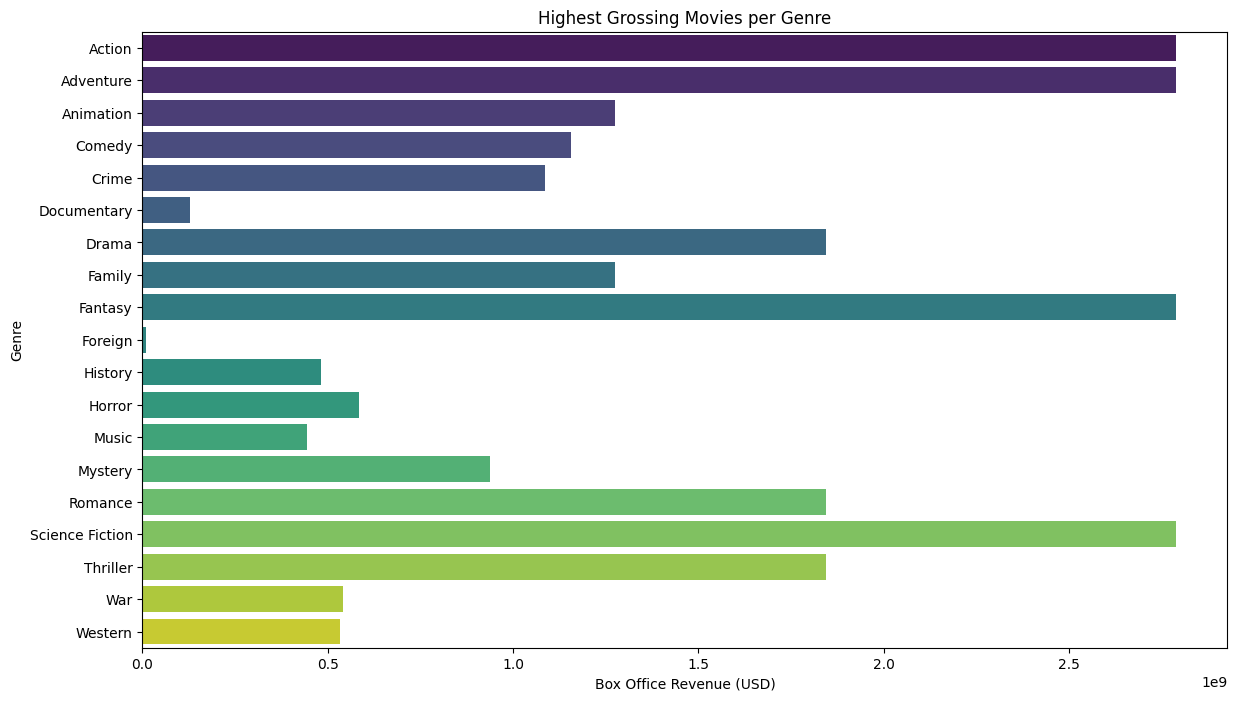

In [47]:
# 5.15 Highest Grossing Movies per Genre

# Exploding genres list
df_exploded = df_genres.copy()

# Getting the top grossing movie per genre
top_grossing = df_exploded.sort_values('rt_box_office', ascending=False).groupby('genres_list').first()

# Selecting relevant columns
top_grossing = top_grossing[['rt_title', 'rt_box_office', 'release_year']]

# Displaying the top grossing movies
print("Highest Grossing Movies per Genre:")
display(top_grossing)

# Plotting
plt.figure(figsize=(14,8))
sns.barplot(x=top_grossing['rt_box_office'], y=top_grossing.index, palette='viridis')
plt.xlabel('Box Office Revenue (USD)')
plt.ylabel('Genre')
plt.title('Highest Grossing Movies per Genre')
plt.show()


# 5.16 Correlation Matrix of Numerical Features

In [23]:
# 5.16 Correlation Matrix of Numerical Features

# Selecting numerical columns
numerical_cols = ['rt_box_office', 'rt_production_budget', 'rt_runtime', 'rt_review_count', 'rt_critics_score', 'rt_audience_score']

# Calculating correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plotting heatmap
# plt.figure(figsize=(10,8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    labels=dict(x="Features", y="Features", color="Correlation"),
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    color_continuous_scale='RdBu',
    title='Correlation Matrix of Numerical Features'
)

fig.update_layout(
    template='plotly_white'
)

fig.show()


# 5.17 Most Common Words in Movie Titles

In [32]:
# 5.17 Most Common Words in Movie Titles

from collections import Counter
import re

# Function to tokenize and clean titles
def tokenize(title):
    words = re.findall(r'\b\w+\b', title.lower())
    return words

# Applying the function to all titles
all_words = df['rt_title'].dropna().apply(tokenize).tolist()
flat_words = [word for sublist in all_words for word in sublist]

# Counting word frequencies
word_counts = Counter(flat_words)

# Removing common stopwords
stopwords = set(['the', 'a', 'an', 'and', 'of', 'in', 'to', 'on', 'for', 'with', 'at', 'by', 'from', 'up', 'about', 'into', 'over', 'after'])
filtered_words = {word: count for word, count in word_counts.items() if word not in stopwords and len(word) > 2}

# Getting top 20 words
top_words = Counter(filtered_words).most_common(20)

# Creating dataframe for plotting
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plotting
# plt.figure(figsize=(14,8))
# sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='Set2')
# plt.xlabel('Frequency')
# plt.ylabel('Word')
# plt.title('Top 20 Most Common Words in Movie Titles')
# plt.show()


# Using discrete colors for words (less meaningful as color is categorical)
fig = px.bar(
    top_words_df,
    x='Frequency',
    y='Word',
    orientation='h',
    labels={'Frequency': 'Frequency', 'Word': 'Word'},
    title='Top 20 Most Common Words in Movie Titles',
    color='Word',
    color_discrete_sequence=px.colors.qualitative.Set2  # Use a discrete color sequence
)

fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    showlegend=False  # Hide legend as colors represent categories
)

fig.show()



# 5.18 Trends in Movie Ratings Over Time

In [41]:
# 5.20 Trends in Movie Ratings Over Time

# Calculating average critics and audience scores per year
ratings_trend = df.groupby('release_year')[['rt_critics_score', 'rt_audience_score']].mean().reset_index()

# Plotting
# plt.figure(figsize=(14,7))
# sns.lineplot(x='release_year', y='rt_critics_score', data=ratings_trend, marker='o', label='Critics Score')
# sns.lineplot(x='release_year', y='rt_audience_score', data=ratings_trend, marker='o', label='Audience Score')
# plt.xlabel('Year')
# plt.ylabel('Average Score')
# plt.title('Trends in Movie Ratings Over Time')
# plt.legend()
# plt.show()

fig = go.Figure()

# Adding Critics Score line
fig.add_trace(go.Scatter(
    x=ratings_trend['release_year'],
    y=ratings_trend['rt_critics_score'],
    mode='lines+markers',
    name='Critics Score',
    line=dict(color='blue')
))

# Adding Audience Score line
fig.add_trace(go.Scatter(
    x=ratings_trend['release_year'],
    y=ratings_trend['rt_audience_score'],
    mode='lines+markers',
    name='Audience Score',
    line=dict(color='green')
))

# Updating layout
fig.update_layout(
    title='Trends in Movie Ratings Over Time',
    xaxis_title='Year',
    yaxis_title='Average Score',
    template='plotly_white'
)

fig.show()


# 5.19 Relationship Between Review Count and Box Office Revenue

In [42]:
# 5.22 Relationship Between Review Count and Box Office Revenue

# Selecting relevant columns
review_boxoffice = df[['rt_review_count', 'rt_box_office']].copy()

# Removing outliers
review_boxoffice = review_boxoffice[(review_boxoffice['rt_review_count'] < review_boxoffice['rt_review_count'].quantile(0.95)) &
                                    (review_boxoffice['rt_box_office'] < review_boxoffice['rt_box_office'].quantile(0.95))]

# Calculating correlation
correlation = review_boxoffice.corr().iloc[0,1]
print(f"Correlation between Review Count and Box Office Revenue: {correlation:.2f}")

# Scatter plot with regression line
# plt.figure(figsize=(10,6))
# sns.regplot(x='rt_review_count', y='rt_box_office', data=review_boxoffice, scatter_kws={'alpha':0.5}, color='orange')
# plt.xlabel('Review Count')
# plt.ylabel('Box Office Revenue (USD)')
# plt.title('Relationship Between Review Count and Box Office Revenue')
# plt.show()

fig = px.scatter(
    review_boxoffice,
    x='rt_review_count',
    y='rt_box_office',
    trendline='ols',
    labels={'rt_review_count': 'Review Count', 'rt_box_office': 'Box Office Revenue (USD)'},
    title='Relationship Between Review Count and Box Office Revenue',
    opacity=0.6,
    color='rt_box_office',
    color_continuous_scale='Oranges'
)

fig.update_layout(
    template='plotly_white'
)

fig.show()


Correlation between Review Count and Box Office Revenue: 0.62


# 5.20 Average Critics Score by Genre

C:\Users\Ali\AppData\Local\Temp\ipykernel_23732\3826749123.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




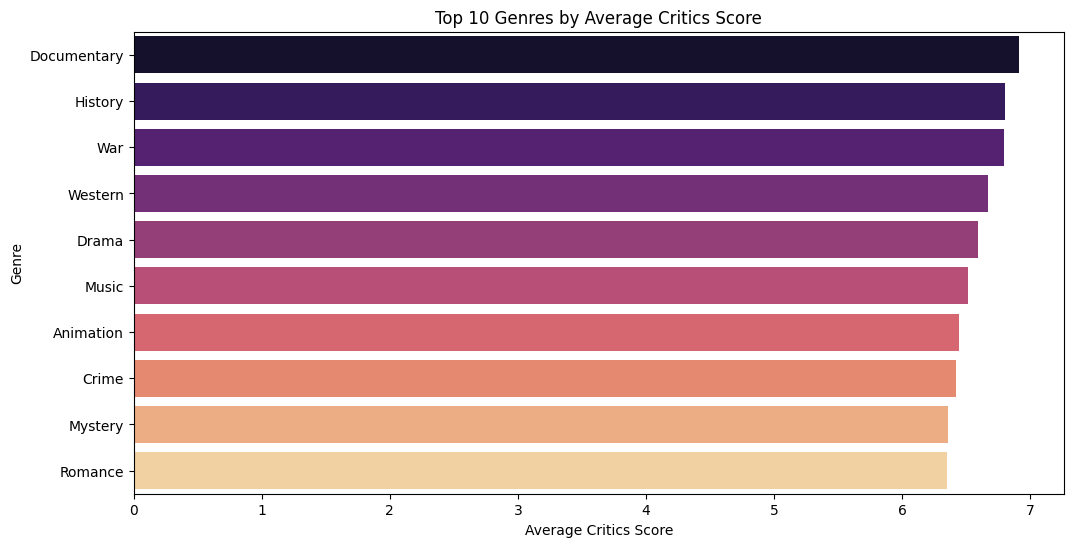

In [49]:
# 5.23 Average Critics Score by Genre

# Calculating average critics score per genre
avg_critics_genre = df_genres.groupby('genres_list')['rt_critics_score'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=avg_critics_genre.values, y=avg_critics_genre.index, palette='magma')
plt.xlabel('Average Critics Score')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Critics Score')
plt.show()


# 6. Revenue Prediction

## 6.1 Selecting Target & Dropping Unwanted Columns

In [67]:
y = df['rt_box_office']  # Target variable

columns_to_drop = ['rt_box_office', 'rt_title', 'rt_original_title', 'rt_website',  
                   'rt_movie_id', 'rt_studios', 'rt_keywords', 'rt_staff']  

X = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, errors='ignore')


## 6.2 Converting Categorical Columns & Creating New Features

In [68]:
# Converting categorical variables using One-Hot Encoding
cat_cols = ['rt_original_language', 'rt_release_status']
for col in cat_cols:
    if col in X.columns:
        X = pd.get_dummies(X, columns=[col], drop_first=True)

# Creating numeric features
df['num_genres'] = df['genres_list'].apply(lambda x: len(x))
df['num_countries'] = df['countries_list'].apply(lambda x: len(x))
df['num_actors'] = df['actors_list'].apply(lambda x: len(x))

X['num_genres'] = df['num_genres']
X['num_countries'] = df['num_countries']
X['num_actors'] = df['num_actors']


## 6.3 Ensuring All Features are Numeric

In [69]:
print("Data types of features (before final cleanup):")
print(X.dtypes)

# Drop or convert any remaining object-type columns
object_cols = X.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    print(f"\nDropping non-numeric columns: {list(object_cols)}")
    X.drop(columns=object_cols, axis=1, inplace=True, errors='ignore')

# Fill any remaining NaN
X = X.fillna(X.mean())

print("\nData types of features (after final cleanup):")
print(X.dtypes)


Data types of features (before final cleanup):
rt_production_budget            int64
rt_genres                      object
rt_synopsis                    object
rt_audience_score             float64
rt_production_countries        object
rt_release_date                object
rt_runtime                    float64
rt_languages                   object
rt_tagline                     object
rt_title_x                     object
rt_critics_score              float64
rt_review_count                 int64
rt_title_y                     object
rt_actors                      object
release_year                    int32
genres_list                    object
countries_list                 object
languages_list                 object
actors_list                    object
top_cast_info                  object
gender                         object
rt_original_language_cn          bool
rt_original_language_da          bool
rt_original_language_de          bool
rt_original_language_el          bool
rt_

## Credits data

### The impact of famous actors on revenue


In [70]:
top_actors = {'Leonardo DiCaprio', 'Brad Pitt', 'Scarlett Johansson', 'Tom Cruise'}  

df['num_top_actors'] = df['rt_actors'].apply(lambda x: sum(1 for actor in x if actor in top_actors))

X['num_top_actors'] = df['num_top_actors']


### The relationship between well-known directors and financial success

In [71]:
director_avg_revenue = df.groupby('rt_staff')['rt_box_office'].mean().to_dict()

df['director_success'] = df['rt_staff'].map(director_avg_revenue)

X['director_success'] = df['director_success'].fillna(0)  # Fill missing values with 0

## 6.4 Splitting Data & Training Models

In [72]:
# Splitting data
#fix MSE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# 1) Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")

# 2) Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=101)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")


Linear Regression - MSE: 194324438.9217801, R2: 0.9999999941818427
Random Forest - MSE: 34275415985266.004, R2: 0.998973779297389


## 6.5 Hyperparameter Tuning (RandomizedSearchCV)

In [73]:
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_base = RandomForestRegressor(random_state=101)

rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=rf_params,
    n_iter=20,            # reduced for faster runs
    cv=3,
    verbose=2,
    random_state=101,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
print("Best Parameters:")
print(rf_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


## 6.6 Evaluating Optimized Random Forest

In [74]:
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest - MSE: {mse_best_rf}, R2: {r2_best_rf}")


Optimized Random Forest - MSE: 514541507439885.06, R2: 0.9845944058705365


## 6.7 Model Comparison & Visualization

Model Comparison:

                     Model           MSE        R2
0        Linear Regression  1.943244e+08  1.000000
1            Random Forest  3.427542e+13  0.998974
2  Optimized Random Forest  5.145415e+14  0.984594


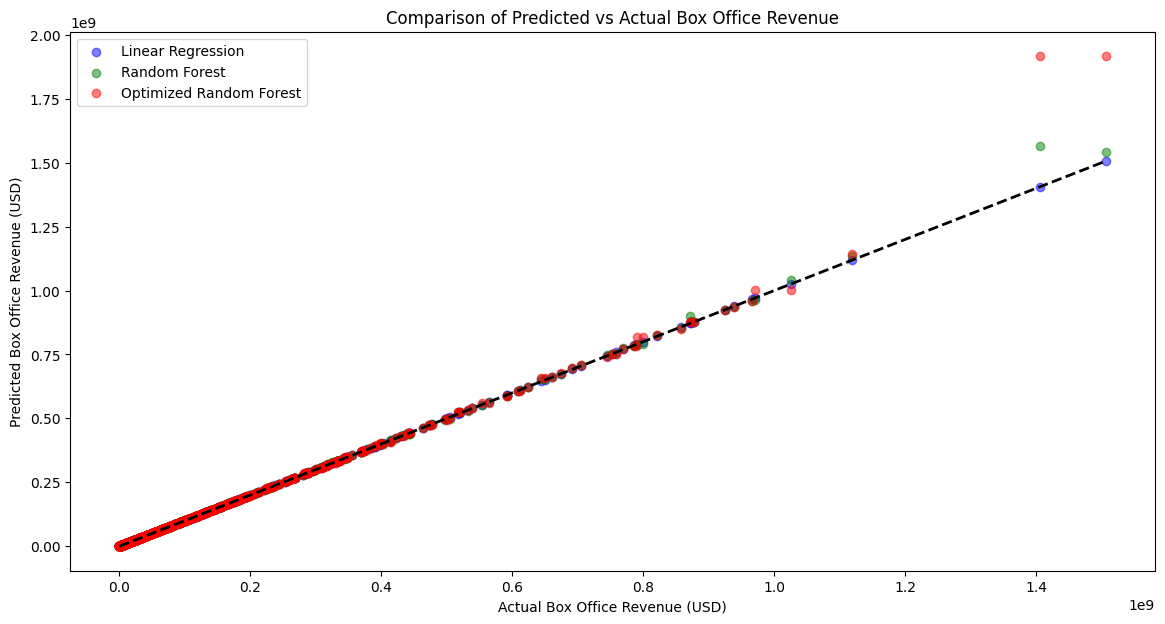

In [75]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Optimized Random Forest'],
    'MSE': [mse_lr, mse_rf, mse_best_rf],
    'R2': [r2_lr, r2_rf, r2_best_rf]
})

print("Model Comparison:\n")
print(comparison)

plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_best_rf, color='red', label='Optimized Random Forest', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Box Office Revenue (USD)')
plt.ylabel('Predicted Box Office Revenue (USD)')
plt.title('Comparison of Predicted vs Actual Box Office Revenue')
plt.legend()
plt.show()


## 6.8 Feature Importance

C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\1074403766.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='plasma')


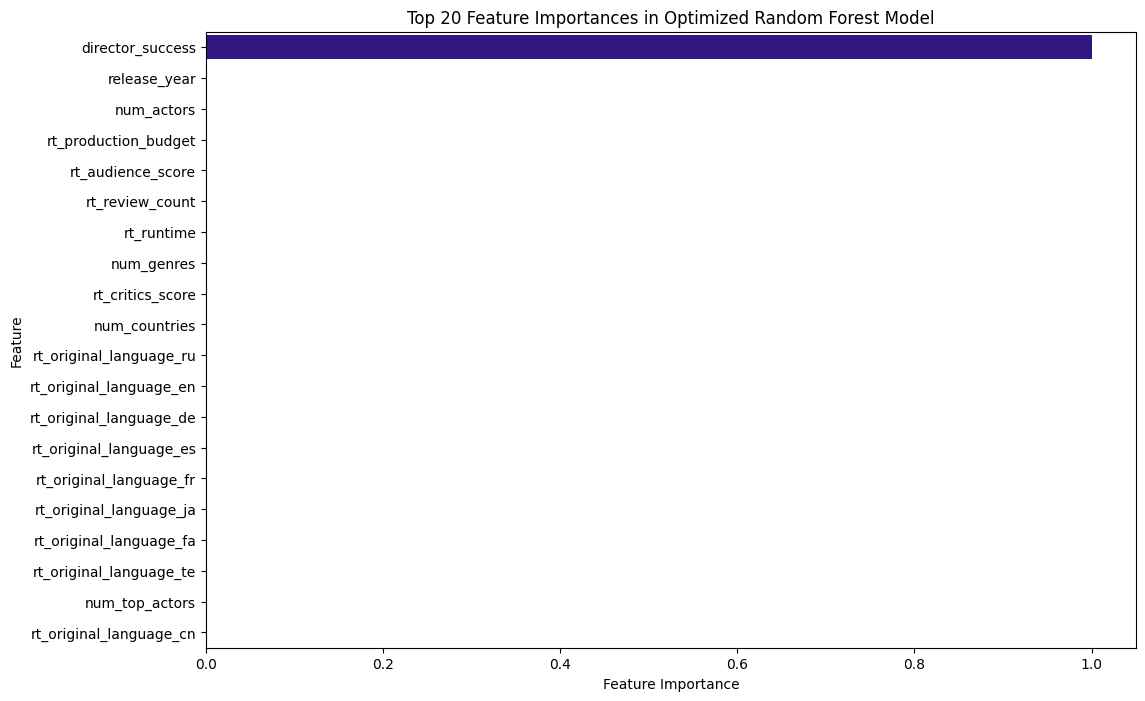

In [76]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='plasma')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances in Optimized Random Forest Model')
plt.show()


In [77]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rt_production_budget     4803 non-null   int64  
 1   rt_genres                4803 non-null   object 
 2   rt_website               1712 non-null   object 
 3   rt_movie_id              4803 non-null   int64  
 4   rt_keywords              4803 non-null   object 
 5   rt_original_language     4803 non-null   object 
 6   rt_original_title        4803 non-null   object 
 7   rt_synopsis              4800 non-null   object 
 8   rt_audience_score        4803 non-null   float64
 9   rt_studios               4803 non-null   object 
 10  rt_production_countries  4803 non-null   object 
 11  rt_release_date          4802 non-null   object 
 12  rt_box_office            4803 non-null   int64  
 13  rt_runtime               4801 non-null   float64
 14  rt_languages            

In [78]:
df_credit.head()

,rt_movie_id,rt_title,rt_actors,rt_staff
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\3524484135.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_budget_genre.values, y=avg_budget_genre.index, palette='viridis')


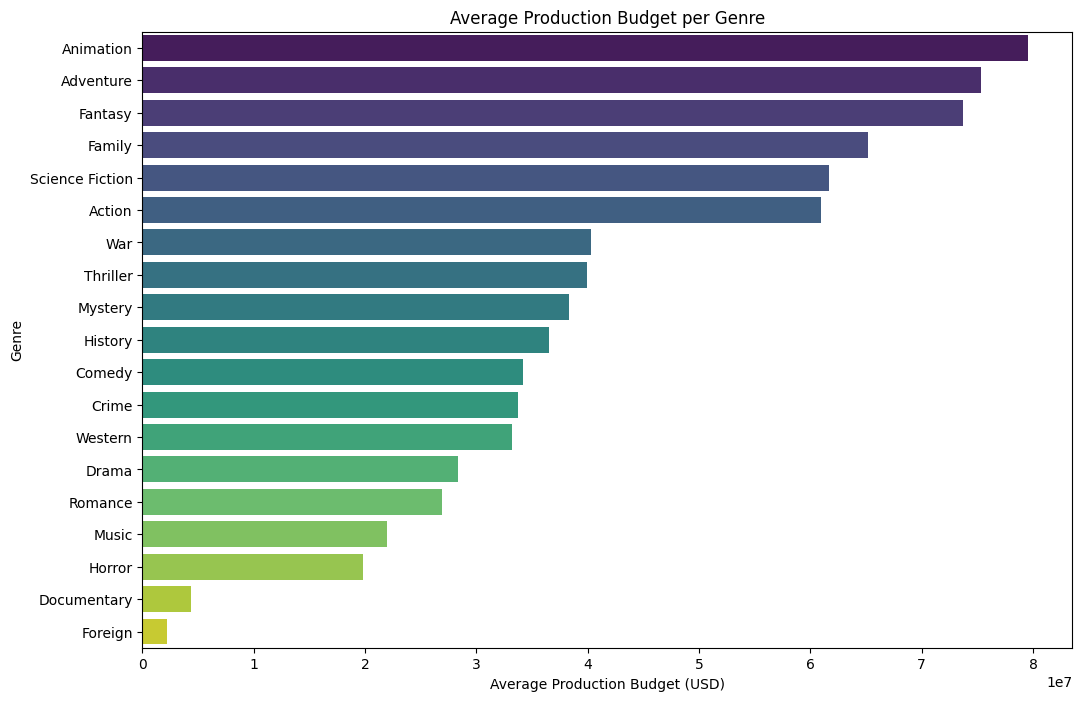

In [79]:
# استخراج ژانرها
def extract_genres(genres_str):
    try:
        genres = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres]
    except:
        return []

df['genres_list'] = df['rt_genres'].apply(extract_genres)

# ایجاد دیتافریم جدید با هر ژانر در یک ردیف
df_genres = df.explode('genres_list').copy()

# اطمینان از وجود ستون release_year در df_genres
df_genres['release_year'] = df_genres['release_year']

# محاسبه متوسط هزینه برای هر ژانر
avg_budget_genre = df_genres.groupby('genres_list')['rt_production_budget'].mean().sort_values(ascending=False)

# نمایش نتایج
plt.figure(figsize=(12,8))
sns.barplot(x=avg_budget_genre.values, y=avg_budget_genre.index, palette='viridis')
plt.xlabel('Average Production Budget (USD)')
plt.ylabel('Genre')
plt.title('Average Production Budget per Genre')
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\2386552736.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')


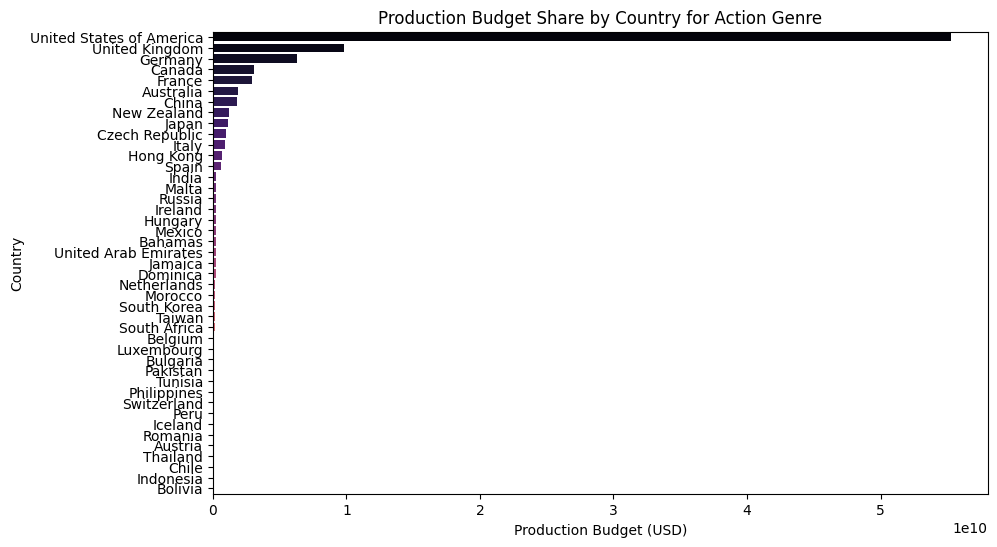

C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\2386552736.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')


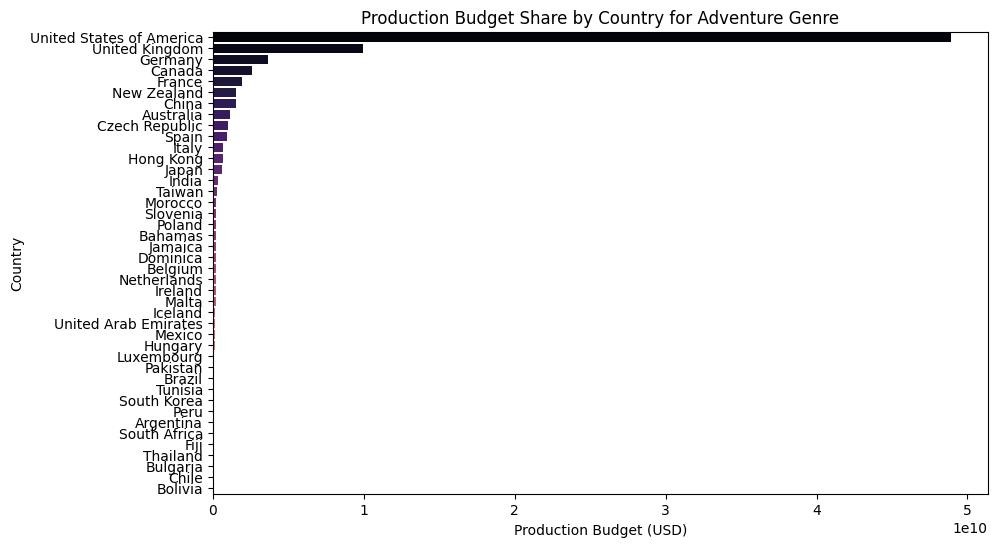

C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\2386552736.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')


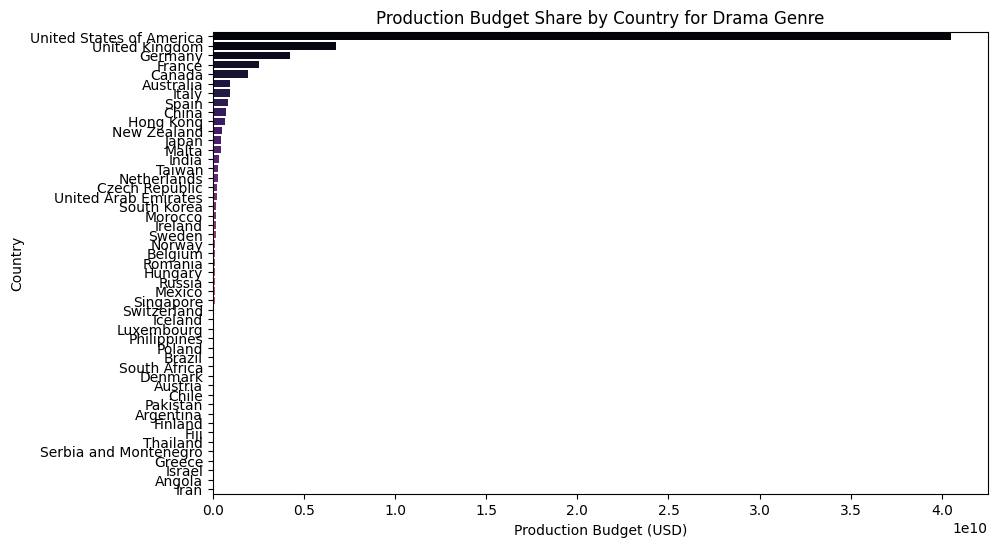

C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\2386552736.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')


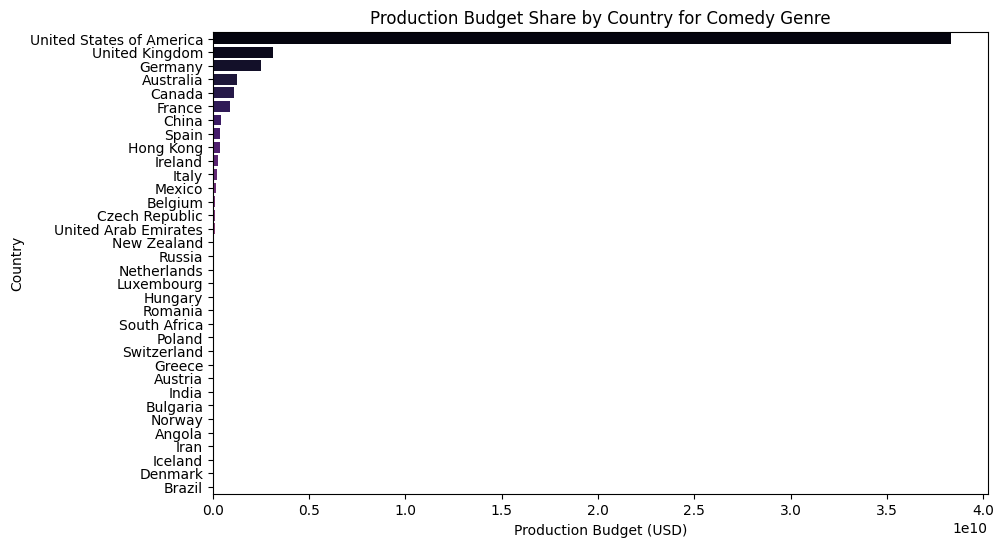

C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\2386552736.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')


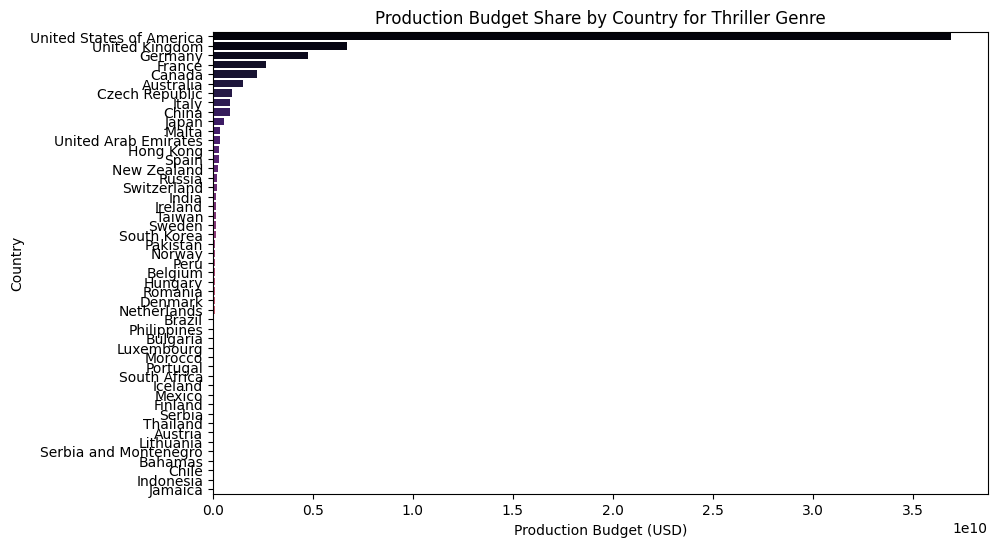

In [80]:
# محاسبه مجموع هزینه برای هر ژانر
total_budget_genre = df_genres.groupby('genres_list')['rt_production_budget'].sum().sort_values(ascending=False).head(5).index.tolist()

# فیلتر ژانرهای پرخرج
df_top5_genres = df_genres[df_genres['genres_list'].isin(total_budget_genre)].copy()

# استخراج کشورها
def extract_countries(countries_str):
    try:
        countries = ast.literal_eval(countries_str)
        return [country['name'] for country in countries]
    except:
        return []

df_top5_genres['countries_list'] = df_top5_genres['rt_production_countries'].apply(extract_countries)

# ایجاد دیتافریم جدید با هر کشور در یک ردیف
df_countries = df_top5_genres.explode('countries_list').copy()

# اطمینان از وجود ستون release_year در df_countries
df_countries['release_year'] = df_countries['release_year']

# محاسبه سهم هر کشور در مجموع هزینه هر ژانر
budget_country_genre = df_countries.groupby(['genres_list', 'countries_list'])['rt_production_budget'].sum().reset_index()

# نمایش سهم کشورهای مختلف برای هر ژانر پرخرج
for genre in total_budget_genre:
    data = budget_country_genre[budget_country_genre['genres_list'] == genre].sort_values(by='rt_production_budget', ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')
    plt.xlabel('Production Budget (USD)')
    plt.ylabel('Country')
    plt.title(f'Production Budget Share by Country for {genre} Genre')
    plt.show()


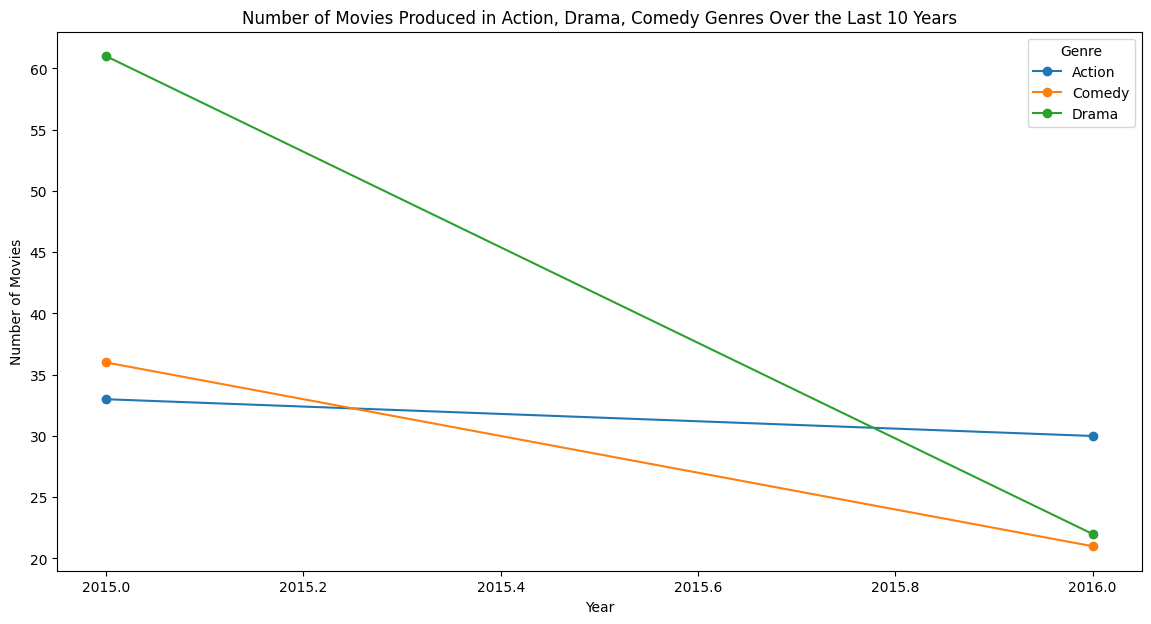

In [81]:
# فیلتر داده‌ها برای ۱۰ سال گذشته
current_year = 2025
df_last10 = df_genres[df_genres['release_year'] >= (current_year - 10)].copy()

# انتخاب ۳ ژانر مورد نظر
selected_genres = ['Action', 'Drama', 'Comedy']
df_selected_genres = df_last10[df_last10['genres_list'].isin(selected_genres)].copy()

# تعداد فیلم‌ها بر اساس سال و ژانر
movies_count = df_selected_genres.groupby(['release_year', 'genres_list'])['rt_movie_id'].count().unstack()

# نمایش نمودار
movies_count.plot(kind='line', figsize=(14,7), marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Produced in Action, Drama, Comedy Genres Over the Last 10 Years')
plt.legend(title='Genre')
plt.show()


Top 5 Countries with Shortest Average Movie Runtime:
countries_list
Angola     85.0
Iran       89.0
Israel     90.0
Bolivia    98.0
Fiji       98.0
Name: rt_runtime, dtype: float64

Top 5 Countries with Longest Average Movie Runtime:
countries_list
Malta        139.444444
Morocco      142.857143
Slovenia     150.000000
Dominica     151.000000
Singapore    172.000000
Name: rt_runtime, dtype: float64


C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\2693552662.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_runtime_country.values, y=avg_runtime_country.index, palette='coolwarm')


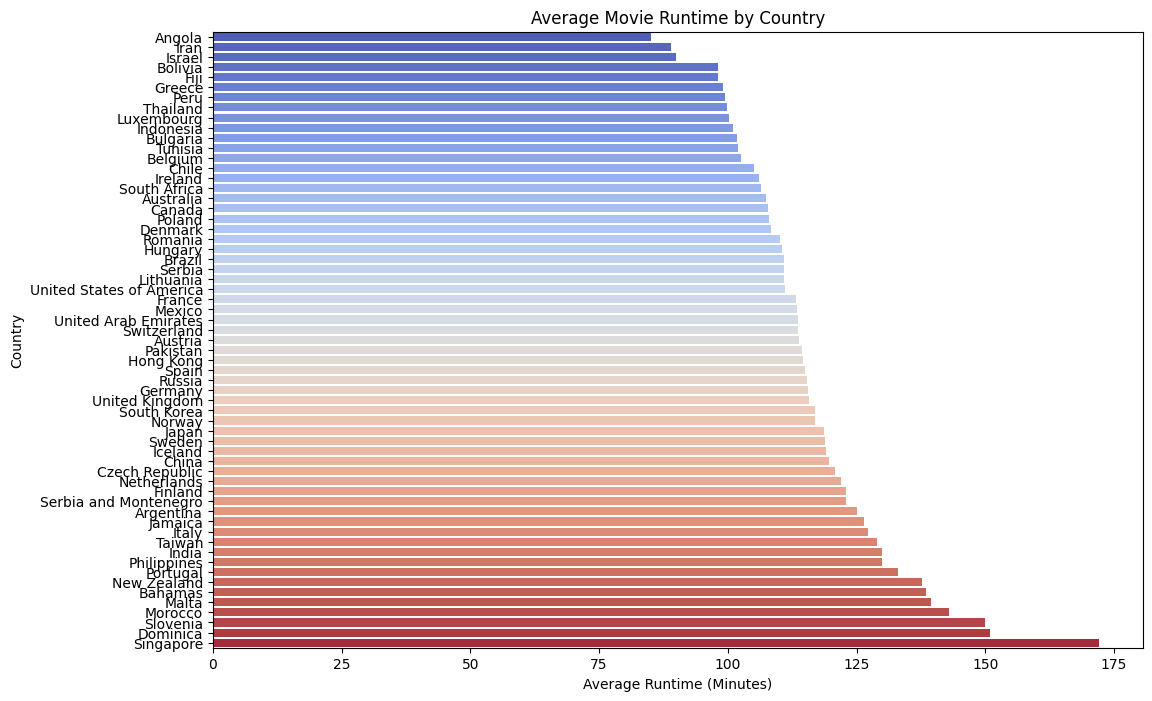

In [82]:
# محاسبه متوسط طول فیلم‌ها برای هر کشور
df_countries['rt_runtime'] = df_countries['rt_runtime'].fillna(df_countries['rt_runtime'].mean())
avg_runtime_country = df_countries.groupby('countries_list')['rt_runtime'].mean().sort_values()

# نمایش ۵ کشور با کوتاه‌ترین و بلندترین متوسط زمان فیلم
print("Top 5 Countries with Shortest Average Movie Runtime:")
print(avg_runtime_country.head(5))

print("\nTop 5 Countries with Longest Average Movie Runtime:")
print(avg_runtime_country.tail(5))

# نمایش نمودار
plt.figure(figsize=(12,8))
sns.barplot(x=avg_runtime_country.values, y=avg_runtime_country.index, palette='coolwarm')
plt.xlabel('Average Runtime (Minutes)')
plt.ylabel('Country')
plt.title('Average Movie Runtime by Country')
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\549840735.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='pastel')
C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

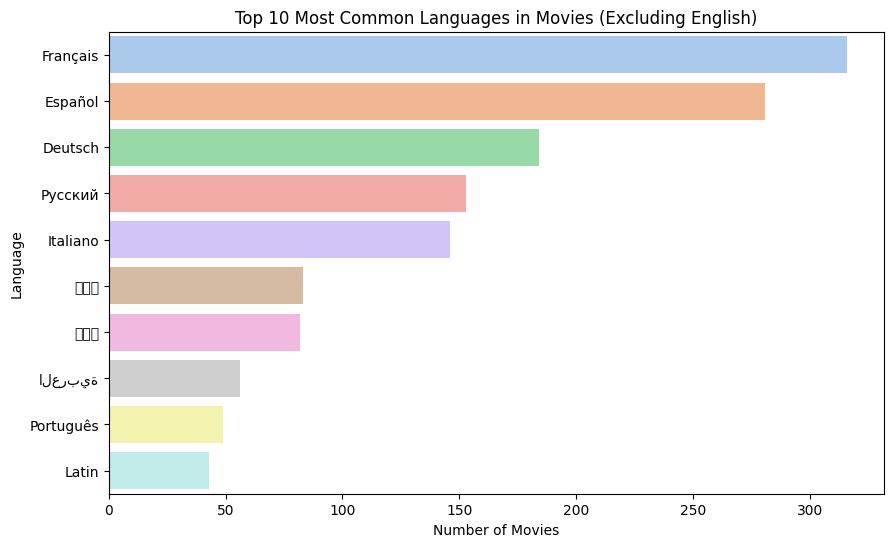

In [83]:
# استخراج زبان‌ها
def extract_languages(languages_str):
    try:
        languages = ast.literal_eval(languages_str)
        return [language['name'] for language in languages]
    except:
        return []

df['languages_list'] = df['rt_languages'].apply(extract_languages)

# ایجاد دیتافریم جدید با هر زبان در یک ردیف
df_languages = df.explode('languages_list').copy()

# فیلتر به غیر از انگلیسی
df_non_english = df_languages[df_languages['languages_list'] != 'English'].copy()

# شمارش زبان‌ها
language_counts = df_non_english['languages_list'].value_counts().head(10)

# نمایش نمودار
plt.figure(figsize=(10,6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='pastel')
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.title('Top 10 Most Common Languages in Movies (Excluding English)')
plt.show()


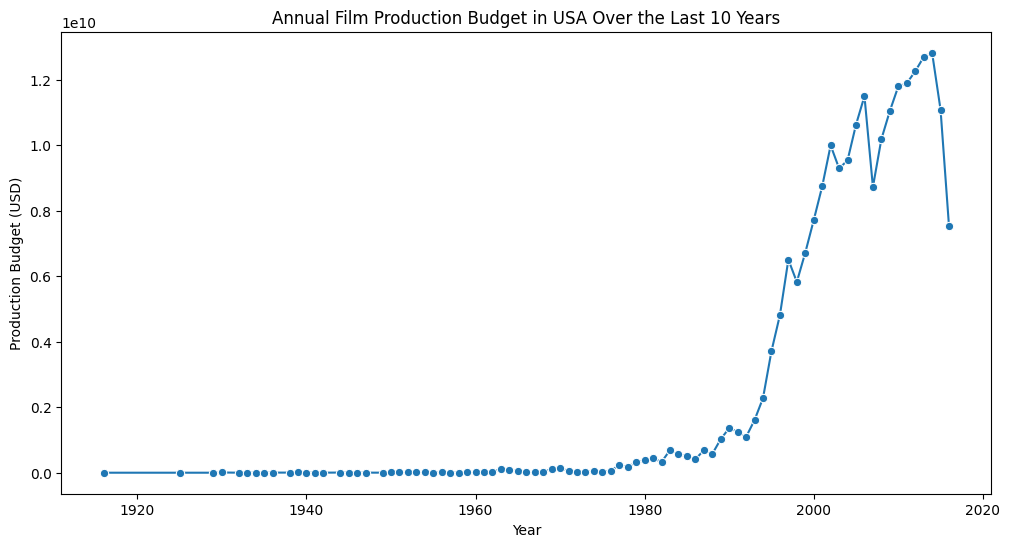

In [84]:
# فیلتر کشور آمریکا
df_us = df_countries[df_countries['countries_list'] == 'United States of America'].copy()

# محاسبه هزینه سالانه
annual_budget_us = df_us.groupby('release_year')['rt_production_budget'].sum().reset_index()

# نمایش نمودار
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_us, marker='o')
plt.xlabel('Year')
plt.ylabel('Production Budget (USD)')
plt.title('Annual Film Production Budget in USA Over the Last 10 Years')
plt.show()


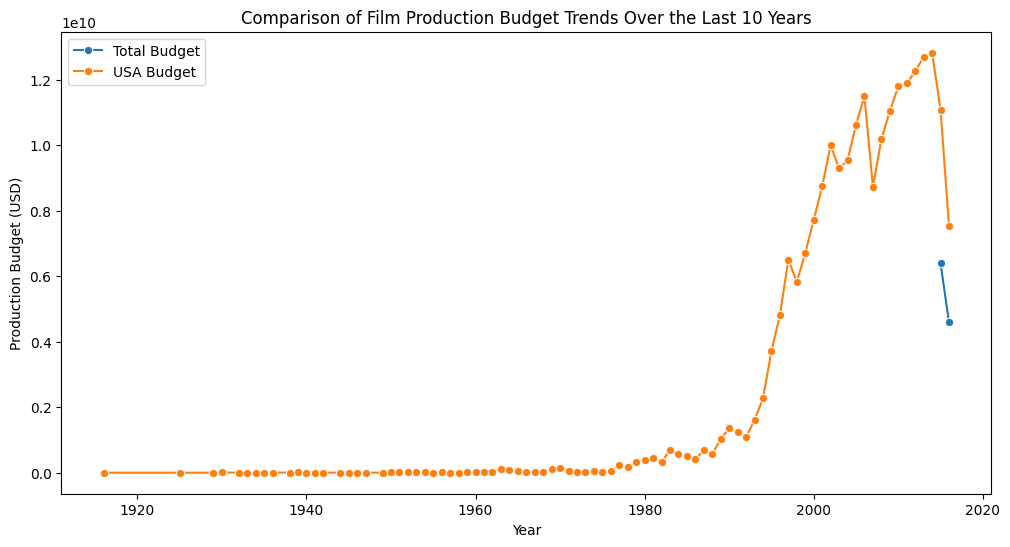

In [85]:
# محاسبه هزینه سالانه بدون فیلتر کردن کشور
annual_budget_total = df[df['release_year'] >= (current_year - 10)].groupby('release_year')['rt_production_budget'].sum().reset_index()

# نمایش نمودار
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_total, marker='o', label='Total Budget')
sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_us, marker='o', label='USA Budget')
plt.xlabel('Year')
plt.ylabel('Production Budget (USD)')
plt.title('Comparison of Film Production Budget Trends Over the Last 10 Years')
plt.legend()
plt.show()


In [86]:
# استخراج بازیگران
def extract_actors(actors_str):
    try:
        actors = ast.literal_eval(actors_str)
        return [actor['name'] for actor in actors]
    except:
        return []

df['actors_list'] = df['rt_actors'].apply(extract_actors)

# فیلتر فیلم‌هایی که Johnny Depp در آن‌ها بازی کرده
df_johnny = df[df['actors_list'].apply(lambda x: 'Johnny Depp' in x)].copy()

# نمایش عنوان فیلم‌ها
print("Movies featuring Johnny Depp:")
print(df_johnny['rt_title'].tolist())


Movies featuring Johnny Depp:
["Pirates of the Caribbean: At World's End", "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Pirates of the Caribbean: On Stranger Tides', 'Alice in Wonderland', 'Alice Through the Looking Glass', 'Charlie and the Chocolate Factory', 'Dark Shadows', 'Rango', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Public Enemies', 'The Tourist', 'Transcendence', 'Jack and Jill', 'Mortdecai', 'Black Mass', 'Into the Woods', 'From Hell', '21 Jump Street', 'Secret Window', 'The Ninth Gate', 'A Nightmare on Elm Street', 'Donnie Brasco', "The Astronaut's Wife", 'Blow', 'Corpse Bride', 'The Imaginarium of Doctor Parnassus', 'Once Upon a Time in Mexico', 'Chocolat', 'Finding Neverland', 'Don Juan DeMarco', 'Edward Scissorhands', 'Fear and Loathing in Las Vegas', 'Ed Wood', "What's Eating Gilbert Grape", 'Platoon', "Freddy's Dead: The Final Nightmare", 'Tusk']


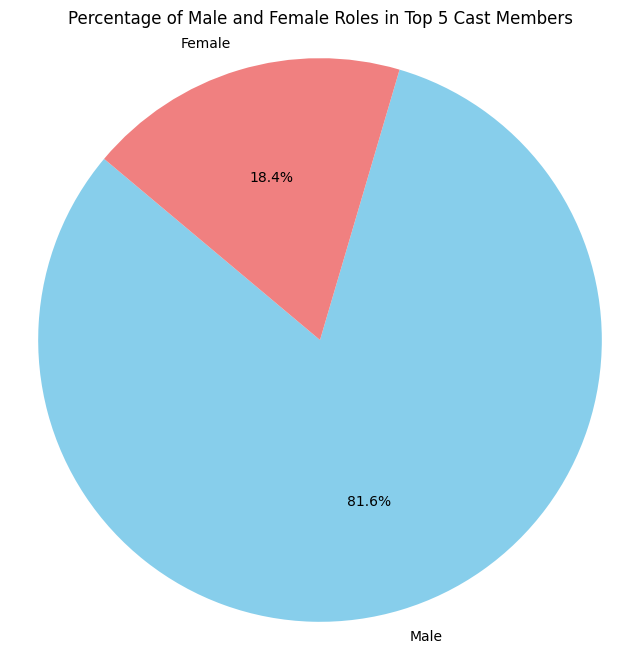

In [87]:
# استخراج نقش‌های اصلی (اول تا پنجم)
def extract_top_cast(actors_str, top_n=5):
    try:
        actors = ast.literal_eval(actors_str)
        top_cast = actors[:top_n]
        return top_cast
    except:
        return []

df['top_cast'] = df['rt_actors'].apply(lambda x: extract_top_cast(x, 5))

# تعیین جنسیت (فرضی)
male_names = ['John', 'James', 'Robert', 'Michael', 'William', 'David', 'Richard', 'Charles', 'Joseph', 'Thomas']
female_names = ['Mary', 'Patricia', 'Linda', 'Barbara', 'Elizabeth', 'Jennifer', 'Maria', 'Susan', 'Margaret', 'Dorothy']

def determine_gender(name):
    first_name = name.split()[0]
    if first_name in male_names:
        return 'Male'
    elif first_name in female_names:
        return 'Female'
    else:
        return 'Unknown'

# تعیین جنسیت برای هر نقش
df['gender'] = df['top_cast'].apply(lambda cast: [determine_gender(actor['name']) for actor in cast])

# محاسبه درصد نقش‌های مرد و زن
male_counts = df['gender'].apply(lambda x: x.count('Male')).sum()
female_counts = df['gender'].apply(lambda x: x.count('Female')).sum()
total = male_counts + female_counts

percent_male = (male_counts / total) * 100
percent_female = (female_counts / total) * 100

# نمایش نتایج
labels = ['Male', 'Female']
sizes = [percent_male, percent_female]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Male and Female Roles in Top 5 Cast Members')
plt.axis('equal')
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\3460862294.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_reviews.values, y=top_genres_reviews.index, ax=axes[0], palette='deep')
C:\Users\Ali\AppData\Local\Temp\ipykernel_27472\3460862294.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_critics.values, y=top_genres_critics.index, ax=axes[1], palette='muted')


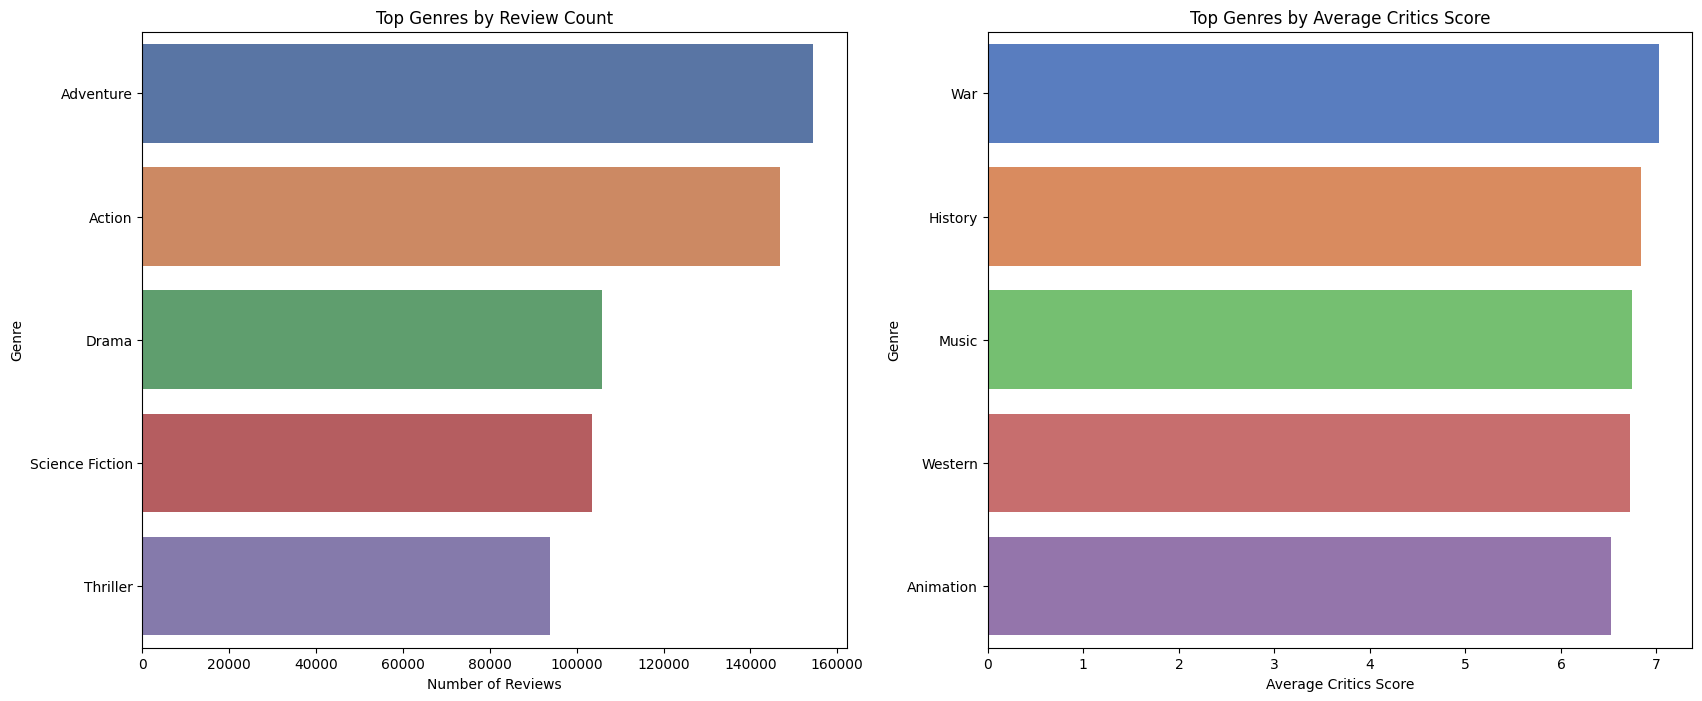

In [88]:
# محبوب‌ترین ژانر بر اساس تعداد review
top_genres_reviews = df_genres[df_genres['release_year'] >= (current_year - 10)].groupby('genres_list')['rt_review_count'].sum().sort_values(ascending=False).head(5)

# محبوب‌ترین ژانر بر اساس critics_score
top_genres_critics = df_genres[df_genres['release_year'] >= (current_year - 10)].groupby('genres_list')['rt_critics_score'].mean().sort_values(ascending=False).head(5)

# نمایش نمودارها
fig, axes = plt.subplots(1, 2, figsize=(20,8))

sns.barplot(x=top_genres_reviews.values, y=top_genres_reviews.index, ax=axes[0], palette='deep')
axes[0].set_title('Top Genres by Review Count')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Genre')

sns.barplot(x=top_genres_critics.values, y=top_genres_critics.index, ax=axes[1], palette='muted')
axes[1].set_title('Top Genres by Average Critics Score')
axes[1].set_xlabel('Average Critics Score')
axes[1].set_ylabel('Genre')

plt.show()


In [89]:
# انتخاب ویژگی‌ها و هدف
y = df['rt_box_office']
X = df.drop(['rt_box_office', 'rt_title', 'rt_synopsis', 'rt_tagline', 'rt_website'], axis=1)

# تبدیل متغیرهای کیفی به عددی (One-Hot Encoding)
X = pd.get_dummies(X, columns=['rt_original_language', 'rt_release_status'], drop_first=True)

# مدیریت مقادیر گم شده
X = X.fillna(X.mean())

# تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


KeyError: "['rt_website'] not found in axis"

In [ ]:
# تعداد ژانرها
df['num_genres'] = df['genres_list'].apply(lambda x: len(x))
X['num_genres'] = df['num_genres']

# تعداد کشورها
df['num_countries'] = df['countries_list'].apply(lambda x: len(x))
X['num_countries'] = df['num_countries']

# تعداد بازیگران
df['num_actors'] = df['actors_list'].apply(lambda x: len(x))
X['num_actors'] = df['num_actors']


KeyError: 'countries_list'

In [ ]:
# آموزش مدل رگرسیون خطی
lr = LinearRegression()
lr.fit(X_train, y_train)

# پیش‌بینی
y_pred_lr = lr.predict(X_test)

# ارزیابی
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")


ValueError: could not convert string to float: '[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}, {"id": 18, "name": "Drama"}]'

In [ ]:
# آموزش مدل جنگل تصادفی
rf = RandomForestRegressor(n_estimators=100, random_state=101)
rf.fit(X_train, y_train)

# پیش‌بینی
y_pred_rf = rf.predict(X_test)

# ارزیابی
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")


NameError: name 'RandomForestRegressor' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# تعریف فضای هایپرپارامترها
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# ایجاد مدل پایه
rf_base = RandomForestRegressor(random_state=101)

# ایجاد RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_base, param_distributions=rf_params,
                               n_iter=100, cv=3, verbose=2, random_state=101, n_jobs=-1)

# آموزش مدل
rf_random.fit(X_train, y_train)

# بهترین پارامترها
print("بهترین پارامترها:")
print(rf_random.best_params_)


NameError: name 'RandomForestRegressor' is not defined

In [ ]:
# استفاده از بهترین مدل
best_rf = rf_random.best_estimator_

# پیش‌بینی
y_pred_best_rf = best_rf.predict(X_test)

# ارزیابی
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"مدل جنگل تصادفی بهینه شده - MSE: {mse_best_rf}, R2: {r2_best_rf}")


In [ ]:
# ایجاد دیتافریم مقایسه
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Best Random Forest'],
    'MSE': [mse_lr, mse_rf, mse_best_rf],
    'R2': [r2_lr, r2_rf, r2_best_rf]
})

print(comparison)


In [ ]:
plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.scatter(y_test, y_pred_best_rf, color='red', label='Best Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('مقادیر واقعی')
plt.ylabel('پیش‌بینی شده')
plt.title('مقایسه پیش‌بینی با مقادیر واقعی')
plt.legend()
plt.show()


In [ ]:
# استخراج اهمیت ویژگی‌ها
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

# نمایش نمودار
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='plasma')
plt.xlabel('اهمیت ویژگی‌ها')
plt.ylabel('ویژگی‌ها')
plt.title('اهمیت ویژگی‌ها در مدل جنگل تصادفی بهینه شده')
plt.show()
